## Apply PCA and Clustering to Wholesale Customer Data
https://github.com/Make-School-Courses/DS-2.1-Machine-Learning/blob/master/Assignments/Home_Work_PCA_Kmeans.ipynb

In this homework, we'll examine the [Wholesale Customers Dataset](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers), which we'll get from the UCI Machine Learning Datasets repository. This dataset contains the purchase records from clients of a wholesale distributor. It details the total annual purchases across categories seen in the data dictionary below:

**Category** | **Description**
:-----|:-----
CHANNEL| 1= Hotel/Restaurant/Cafe, 2=Retailer (Nominal)
REGION| Geographic region of Portugal for each order (Nominal)
FRESH| Annual spending (m.u.) on fresh products (Continuous)
MILK| Annual spending (m.u.) on milk products (Continuous)
GROCERY| Annual spending (m.u.)on grocery products (Continuous)
FROZEN| Annual spending (m.u.)on frozen products (Continuous)
DETERGENTS_PAPER| Annual spending (m.u.) on detergents and paper products (Continuous)
DELICATESSEN| Annual spending (m.u.)on and delicatessen products (Continuous)


**TASK**: Read in `wholesale_customers_data.csv` from the datasets folder and store in a dataframe. Store the `Channel` column in a separate variable, and then drop the Channel and Region columns from the dataframe. Scale the data and use PCA to engineer new features (Principal Components). Print out the explained variance for each principal component.

## K-Means, but Without All the Supervision
**Challenge**: Use K-Means clustering on the `wholesale_customers` dataset, and then again on a version of this dataset transformed by PCA.

Read in the data from the `wholesale_customers_data.csv` file contained within the datasets folder.

Store the `Channel` column in a separate variable, and then drop the `Region` and `Channel` columns from the dataframe. `Channel` will act as our labels to tell us what class of customer each datapoint actually is, in case we want to check the accuracy of our clustering.

Scale the data, fit a k-means object to it, and then visualize the data and the clustering.

Use PCA to transform the data, and then use k-means clustering on it to see if our results are any better.

**Challenge**: Use the confusion matrix function to create a confusion matrix and see how accurate our clustering algorithms were. Which did better--scaled data, or data transformed by PCA?

## Task
### Read in wholesale_customers_data.csv from the datasets folder and store in a dataframe

In [24]:
import pandas as pd

df = pd.read_csv('../dataset/wholesale_customers_data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


### Store the Channel column in a separate variable

In [25]:
channel = df["Channel"] #what you want to predict, 
df['Channel'].value_counts()

1    298
2    142
Name: Channel, dtype: int64

### Drop the Channel and Region columns from the dataframe

In [26]:
df = df.drop(['Channel', 'Region'], axis=1)

### Scale the data and use PCA to engineer new features (Principal Components)
- Use standard_scaler from Day 1 notes

In [27]:
from sklearn import preprocessing

standard_scaler = preprocessing.StandardScaler()
X_ss = standard_scaler.fit_transform(df) #scaled dataset
print(X_ss)

[[ 0.05293319  0.52356777 -0.04111489 -0.58936716 -0.04356873 -0.06633906]
 [-0.39130197  0.54445767  0.17031835 -0.27013618  0.08640684  0.08915105]
 [-0.44702926  0.40853771 -0.0281571  -0.13753572  0.13323164  2.24329255]
 ...
 [ 0.20032554  1.31467078  2.34838631 -0.54337975  2.51121768  0.12145607]
 [-0.13538389 -0.51753572 -0.60251388 -0.41944059 -0.56977032  0.21304614]
 [-0.72930698 -0.5559243  -0.57322717 -0.62009417 -0.50488752 -0.52286938]]


In [80]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) #2 for x and y
X_r = pca.fit_transform(X_ss.T) # What you get from pca, scaled dataset while preserving # turns scaled dataset into 2D to easily visualize data
# X_r = pca.fit_transform(X_ss.T) #transpose
print(X_r)

[[-13.16529976  13.33401886]
 [  7.62263827  -2.7197538 ]
 [ 12.96276901   1.51952887]
 [-14.44942758  -3.57399434]
 [ 14.54015481   2.75032284]
 [ -7.51083475 -11.31012243]]


### Print out the explained variance for each principal component.

In [82]:
# how much information did we preserve?
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

[175.21556203  67.15173367]
[0.5389298  0.20654598]
[0.5389298  0.74547579]


## K-Means Without the Supervision
**Challenge**: Use K-Means clustering on the wholesale_customers dataset, and then again on a version of this dataset transformed by PCA.

Scale the data, fit a k-means object to it, and then visualize the data and the clustering.

Use PCA to transform the data, and then use k-means clustering on it to see if our results are any better.

In [12]:
from sklearn.cluster import KMeans
from scipy.spatial import distance
import matplotlib.pyplot as plt
import numpy as np

def get_k_distortion(data, max_range):
    distortions = []
    K = range(1, max_range)
    for k in K:
        km = KMeans(n_clusters=k)
        km.fit(data)
        distortions.append(sum(np.min(distance.cdist(data, km.cluster_centers_, 'euclidean'), axis=1)) / data.shape[0])

    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()
    
    
get_k_distortion(df, 11)

<Figure size 640x480 with 1 Axes>

In [13]:
# Helper Methods

def evaluate_model(confusion):
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    TP = confusion[1, 1]
    
    accuray = ((TP + TN) / float(TP + TN + FP + FN))
    precision = TP / float(TP + FP)
    recall = TP / float(FN + TP) #important to be high in medical field
    f1_score = 2 * precision * recall / float(precision + recall)
    print("Accuracy: \t", accuray)
    print("Precision: \t", precision)
    print("Recall: \t", recall)
    print("F1_score: \t", f1_score)
#     return (accuray, precision, recall, f1_score) # All of these are better if they are closer to 1


def get_confusion(y, X):
    '''Get confusion matrix from a data
    Parameters:
                y is our target column
                X is our feature columns
    '''
    # split X and y into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0) #split data such that 75% of data is to train, and 25% of data is for testing. Random_state //33m

    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)

    y_pred = logreg.predict(X_test)

    # create confusion matrix
    confusion = metrics.confusion_matrix(y_test, y_pred)
    print("Confusion\n", confusion)
    return confusion

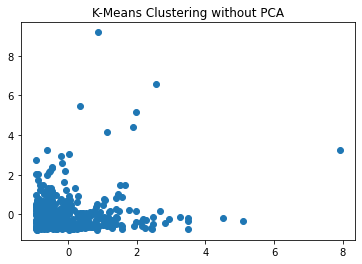

In [18]:
import matplotlib.pyplot as plt



# Visualize the Data and Clusterization
plt.scatter(X_ss[:, 0], X_ss[:, 1])
plt.title('K-Means Clustering without PCA')
plt.show()

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

km = KMeans(n_clusters=2) # turn 6D into 2 coordinates using KMeans
km.fit(X_ss)
print(km.cluster_centers_)

[[ 0.00280244 -0.23920409 -0.25936746 -0.03395237 -0.24524409 -0.09786508]
 [-0.0223623   1.90875103  2.0696465   0.27092606  1.95694778  0.78092337]]


In [21]:
channel_pred = km.predict(X_ss) + 1
print(channel_pred)

[1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1
 1 2 1 1 1 1 2 1 2 2 2 1 2 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 1 1 2 1 1
 1 1 1 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1
 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 2 1 2 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 2 1 1 1 2 1 2 1 1 1 1 2 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 2 1 1 2 1 2 1 1 2 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 2 1
 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1]


In [29]:
print(np.array(channel))

[2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 1 2 1 2 1 2 1 1 2 2 2 1 1 2 1 1 1 1 1 1 2 1
 2 2 1 1 1 2 2 2 2 2 2 2 2 1 1 2 2 1 1 2 2 1 1 2 2 2 2 1 2 1 2 1 1 1 1 1 2
 2 1 1 2 1 1 1 2 2 1 2 2 2 1 1 1 1 1 2 1 2 1 2 1 1 1 2 2 2 1 1 1 2 2 2 2 1
 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1
 1 1 1 1 1 1 1 2 2 1 2 2 2 1 1 2 2 2 2 1 1 1 2 2 1 2 1 2 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 1 1 1 2 1 1 1 2 1 1 2 2 1 1 1 2 1 2 1 2 1 2 1 1 2 1 2 1 2 1 1 1
 1 2 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1
 1 1 1 1 1 2 1 2 1 2 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 2
 1 2 2 1 2 2 2 2 2 2 2 1 1 2 1 1 2 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1
 2 2 2 1 1 1 1 2 2 1 2 1 1 2 2 1 2 1 2 1 2 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1
 2 1 1 2 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1
 2 2 1 1 1 1 1 1 2 2 1 2 1 1 2 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1]


In [30]:
confusion_matrix(channel, channel_pred)

array([[292,   6],
       [ 99,  43]])

In [31]:
accuracy_score(channel, channel_pred)

0.7613636363636364

In [32]:
f1_score(channel, channel_pred)

0.8476052249637155

In [ ]:
predictions = [pred + 1 for pred in y_pred] # 
confusion = get_confusion(target, df)
evaluate_model(confusion)

## K-Means Clustering with PCA

In [72]:
# build a matrix of the feature values, not including Channel and Region
X = np.array([df[i].values for i in df.columns if i != 'Channel' or i != 'Region'])

# calculate the PCA
pca = PCA(n_components=2) # apply 2 components only

# Find the principle components of each features
X_r = pca.fit_transform(X_ss)

In [73]:
X_r

array([[ 1.93290546e-01, -3.05099963e-01],
       [ 4.34419896e-01, -3.28412623e-01],
       [ 8.11143234e-01,  8.15095701e-01],
       [-7.78647832e-01,  6.52753734e-01],
       [ 1.66287259e-01,  1.27143372e+00],
       [-1.56169932e-01, -2.95140988e-01],
       [-3.35288404e-01, -5.25003258e-01],
       [ 1.40586434e-01, -2.30992687e-01],
       [-5.17319541e-01, -6.59362827e-01],
       [ 1.59210908e+00, -7.41011332e-01],
       [ 6.38085945e-01, -4.01825201e-01],
       [-9.27692579e-01, -2.19287242e-01],
       [ 9.91362176e-01,  6.85910808e-01],
       [ 8.50246760e-01, -8.56919642e-02],
       [ 8.45043794e-01,  1.54724325e-01],
       [-9.51585375e-01, -4.95908498e-01],
       [ 5.57558717e-01, -1.02612272e+00],
       [-3.52538598e-01,  2.07075910e-01],
       [ 3.16578563e-01,  4.42066292e-01],
       [-3.23755737e-01, -7.03586946e-01],
       [-3.20000597e-01,  1.56628147e-01],
       [-1.11844720e+00, -2.30527519e-01],
       [-1.76694545e-01,  2.14371699e+00],
       [ 4.

In [74]:
km = KMeans(n_clusters=2)
km.fit(X_r)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [75]:
channel_pred = km.predict(X_r) + 1
channel_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [76]:
confusion_matrix(channel, channel_pred)

array([[296,   2],
       [ 99,  43]])

In [77]:
accuracy_score(channel, channel_pred)

0.7704545454545455

In [78]:
f1_score(channel, channel_pred)

0.8542568542568543

In [64]:
# print(df.columns[0:])
# for feature, (plot_x, plot_y) in enumerate(zip(X_r[:, 0], X_r[:, 1])):
#     plt.scatter(plot_x, plot_y)
#     plt.text(plot_x+0.5, plot_y+0.5, df.columns[0:][feature])
# plt.show()

## Challenge: Use the confusion matrix function to create a confusion matrix and see how accurate our clustering algorithms were. 
- Which did better: scaled data or data transformed by PCA?

### Evaluate model